# <span style="color:blue">Tree Data Structures
AWS CLOUD INSTITUTE: PROVIDED FOR EDUCATIONAL INSTRUCTIONAL PURPOSES ONLY.

We were introduced to trees in the last module in the discussion of Heaps, but in this module we will dive deeper into tree data structures, and their many applications.

# Basic Tree Data Structures
We will look at some specialized tree data structures later, but we start with a **basic tree**:
- A **root node** at the **top** of the tree.
- **Each node** has **zero or more children** nodes.

## Implementing a Tree from Scratch
**Implementing** a **tree** involves two **key components**:
- A **tree node class**, containing the **data and pointers** to other nodes
- **Operations** to manipulate the tree nodes **to build** and **maintain** a **tree**

The **tree node** is **generally** implemented as **a class**, but there are some **options** when it comes to where **to implement** the **tree operations**:
- The operations can be implemented in **separate Python functions**
- The operations can be implemented as **methods inside** the **node class** itself
- The operations can be implemenmted as **methods in** a **distinct Tree class**

A **distinct tree class** is generally a **good approach** **when** there are **very specific rules** **controlling** the **tree**. We'll see some examples of that later.


### TreeNode Class
For our **basic example we will take** the **approach** of a having the **methods inside** the **tree Node**.  This works well, since there are **no specific rules controlling** the **relationship between** all the **nodes**.

**Note**: The code below is using some concepts with have not discussed yet, but we will shortly

#### New concepts in this code
The code below includes a couple of new concepts that appeared in the eLearning examples. We're not discussing them in detail here, but for the sake of clarity, we'll briefly introduce them.

##### Python type hints
Some function definitions includ expressions like, *": Any"* and *"-> TreeNode"*. This **code sample**, and a few others in our eLearning, make **use** of this special **Python notation** for **indicating data types**. These are **not enforced by Python kernels**, but they are useful for documentation, and are also by external tools. This is not a topic we will discuss in depth, but you can look for **more information** in the **official Python documentation**: https://docs.python.org/3/library/typing.html

We will remove the notation from other subsequent examples, to focus on the main topic of this module. The **notation** is **not required** **for** the **code to work**.

##### Custom iterators
Our **class includes** an **\_\_iter()\_\_ method**, which returns an iterator to allow iteration over the data in the tree.  Although we have used iterators on python lists and dictionaries in the past, we had not seen this kind of custom iterator before. This is **similar to** the concept of **operator overloading** we saw in a previous module. **If** you **have** a type of **class where "iterating" makes sense** (and clearly walking through our tree is an example of that), we **can define our own** iterator. Again, this is not a topic we will discuss in depth, but there is an **article in the official Python documentation** about it: https://docs.python.org/3/howto/functional.html#iterators

##### Recursion
We see a couple exemples of **recursion** in the *TreeNode* class. Recursion is **when** a **function or method calls itself**. Recursion is a **complex topic**, which we will **cover in depth in the future**.

In [ ]:
from typing import Any, Iterator

class TreeNode:
    '''
    Node for a binary tree
    '''
    def __init__(self, data: Any, parent = None):
        '''
        Parameters:
            data: The data to be stored in the node
            children: List of children nodes
            parent: Pointer to the parent node
        '''
        self.data = data
        self.children = []
        self.parent = parent
        
    def insert_child(self,  data: Any) -> 'TreeNode':
        '''
        Insert a child under this node, and return it.
        '''
        # create child node, specifying this node as the parent
        child = TreeNode(data, parent=self)

        # add the child to the list of children
        self.children.append(child)

        # return the child node
        return child

    def __iter__(self) -> Iterator[Any]:
        '''
        Iterate over the children of this node, allowing iteration through all of the tree data.
        '''
        # initialize the iterator to the current node data
        result = self.data

        # recursively the children data. The loop below will recursively call this iterator on all children
        for child in self.children:
            result.extend(child)

        # result the final iterator
        return iter(result)

    def print_tree(self, indent: int = 0):
        '''
        Print the tree
        '''
        # print the current node, indented by the current indent value
        print("    " * indent + str(self.data))

        # recursively print the children, adding to the indentation
        for child in self.children:
            child.print_tree(indent + 1)

#### Creating the Tree
In this approach, where we don't have a separate tree class, **"creating the tree"** simply **means creating** the **root node**.

In my **example**, I'll build a **family tree** for some **fictional characters**.

##### Starting with the root node

In [ ]:
# Create our first family member, which will become the root node for this tree 
root = TreeNode("Tigraine") 

##### Adding some children to the family

In [ ]:
# create children of Tigraine, adding them to the tree
rand = root.insert_child("Rand")
galad = root.insert_child("Galad")

# print current tree from the root
root.print_tree()

##### Adding some grand-children

In [ ]:
# Rand has some children, so these will be grand-children on Tigraine
calian = rand.insert_child("Calian")
shivan = rand.insert_child("Shivan")
janduin = rand.insert_child("Janduin")

# print current family tree from the root
root.print_tree()

# Binary Search Tree
A binary search tree (BST) is a **tree data structure** with the following properties:
- **No duplicate** elements.
- **Each node** has no more than **two children**, a left child and a right child
    - **Left** child value is always **less than** the current node.
    - **Right** child value is always **greater than** the current node.

### TreeNode Class

In [ ]:
class TreeNode:
    '''
    Node for a binary tree
    '''
    def __init__(self, key):
        '''
        Parameters:
            key: The key to be stored in the node
            left: Pointer to the left child node
            right: Pointer to the right child node
        '''
        self.key = key
        self.left = None
        self.right = None
        
    def __str__():
        return self.key

### BinarySearchTree Class
The binary search tree class will perform the basic operations required to implementain and maintain the properties we defined.

In [ ]:
class BinarySearchTree:
    '''
    A Binary Search Tree
    '''
    def __init__(self):
        # initialize the root of the tree
        self.root = None

        # track size of tree
        self._size = 0

    def _insert_node(self, curr_node, new_key):
        '''
        This method will insert a node in the binary tree, by recursively trying to insert 
        on the left or right subtree, depending on whether the key is smaller or larger 
        than the current node.

        Returns the node that was inserted.
        '''
        # if the current node is None, than we found the right place to insert, so create a node for the key
        if curr_node is None:
            self._size += 1
            return TreeNode(new_key)
        
        # else, if the new key is less than the current key, recursively try to insert on the left
        elif new_key < curr_node.key:
            curr_node.left = self._insert_node(curr_node.left, new_key)
            
        # else, if the new key is greater than the current key, recursively try to insert on the right
        elif new_key > curr_node.key:
            curr_node.right = self._insert_node(curr_node.right, new_key)
            
        # if we went through both comparisons, then the key is equal to the current key, so do nothing

        # return the updated node
        return curr_node


    def insert(self, new_key):
        '''
        Starting at the root, invoke recursive method to insert node for this key
        '''
        self.root = self._insert_node(self.root, new_key)

    def size(self):
        '''
        Returns the size of the tree (numbet of nodes). Size is being maintained as we insert new nodes,
        otherwise we would have to traverse the whole tree to count.
        '''
        return self._size

    def _traverse_tree(self, node, result):
        '''
        This method will recursively traverse a tree in order from lowest to highest, starting from the input node
        '''

        # if the node is not None
        if node:
            # recursively traverse the left sub-tree first, since we want to traverse from smallest to largest
            self._traverse_tree(node.left, result)

            # now append current node to result list
            result.append(node.key)

            # recursively traverse the right sub-tree for the larger items
            self._traverse_tree(node.right, result)

    def traverse(self):
        '''
        Returns a list of the tree's data, in order from smallest to largest
        '''

        # kick off a recursive traversal of the tree, starting at the root
        result = []
        self._traverse_tree(self.root, result)
        return result
    

    def _search(self, curr_node, search_key):
        '''
        Search for a value in the binary search tree, by recursively looking for it on the left and right subtree,
        depending on whether the value is smaller or larger than the current node.
        '''
        # if the current node is None, then the value is not in the tree
        if (curr_node is None):
            return False

        # if the current node value is the same as the search value, return True
        elif (curr_node.key == search_key):
            return True

        # else, if the search value is larger, then try to find on the right
        elif (search_key > curr_node.key):
            return self._search(curr_node.right, search_key)

        # else the search value is smaller, so try to find on the left
        else:
            return self._search(curr_node.left, search_key)

    def search(self, search_key):
        '''
        Search for a value in the binary search tree.
        This will trigger a recursive lookup, starting at the root of the tree.
        '''
        return self._search(self.root, search_key)

    def balance_factor(self):
        '''
        This method will calculate the balance factor of the tree, which is the difference between the
        height of the left and right subtrees. A positive value means the left subtree is taller,
        while a negative value means the right subtree is taller.
        '''
        # calculate the height of the left and right subtrees
        left_height = self._height(self.root.left)
        right_height = self._height(self.root.right)

        # return the difference between the heights
        return left_height - right_height

    def _height(self, node):
        '''
        This method will calculate the height of a given node, by recursively calculating the height
        of its left and right subtrees, and returning the maximum height plus one.
        '''
        # if the node is None, return -1 (base case for recursion)
        if (not node):
            return -1

        # recursively calculate the height of the left and right subtrees
        left_height = self._height(node.left)
        right_height = self._height(node.right)

        # return the maximum height plus one
        return max(left_height, right_height) + 1
        
    def _to_str(self, curr_node, level):
        '''
        Recursive function that will print elements of a tree, indenting to the right based on level
        '''
        # initialize return string
        curr_str = ""
        edge_indicator = ""
        
        # if the current node is not None ...
        if curr_node:
            # set an indicator to help visualize which children nodes
            if (curr_node.left and curr_node.right):
                edge_indicator = "<"
            elif (curr_node.left):
                edge_indicator = "\\"
            elif (curr_node.right):
                edge_indicator = "/"
            else:
                edge_indicator = ""
                
            # recusively add the right sub-tree, incresing the level (indentation)
            curr_str += self._to_str(curr_node.right, level + 1) 

            # add the data in this node
            curr_str += "          " * level + str(curr_node.key) + edge_indicator + "\n"

            # recusively add the left sub-tree, incresing the level (indentation)
            curr_str += self._to_str(curr_node.left, level + 1)

        # return string for this node/sub-tree
        return curr_str

    def __str__(self):
        '''
        Call internal method that will recursively print all nodes, starting with the root
        '''
        # starting add the root, generate string recursively
        return self._to_str(self.root, 0)

#### Quick Test
Just to confirm the tree is working, we'll add a few simple nodes and print it

In [ ]:
# create a new binary tree
test_tree= BinarySearchTree()

# add data to the tree
test_tree.insert(7)
test_tree.insert(4)
test_tree.insert(9)
test_tree.insert(2)
test_tree.insert(5)
test_tree.insert(3)

print(f"My tree has {test_tree.size()} nodes, and it looks a little like this:\n")
print(test_tree)

##### Import modules
We'll be using a couple of modules in the upcoming analysis, so we'll import them here

In [ ]:
import time
import random

#### Loading data for my tree
To **test** my **binary search tree** I want to have a lot of keys, so inserting them by hand would be hard. I'll use **use** the **python random module** to **generate** a **large set of random numbers**, and convert them to strings.

In [ ]:
# Use a variable to control the number of keys I generate, because we may want to change that to do different tests.
NUMBER_OF_KEYS = 10000

In [ ]:
# intially use a set, to guarantee no duplicates
key_set = set({})
while len(key_set) < NUMBER_OF_KEYS:
    # generate a very large random integer, convert it to a string, and add to set
    key_set.add(str(random.randint(0, 1000000000)))

# verify the size
print(f"Generated {len(key_set)} unique keys.")

# print the first 5 items so we can confirm the types of keys being inserted
print(f"Sample keys: {list(key_set)[0:5]}")

#### Creating a Binary Search Tree
We'll create new Binary Search Tree here, where we will load our keys.

In [ ]:
# create a new binary search tree
bst_tree= BinarySearchTree()

#### Load tree with key data
Now we'll iterate through our set of keys, and insert all of them in our binary search tree. **For** a **very large number**, this **will take** a bit of **time**. We'll using the time libary to check how long it takes to perform each insert.

In [ ]:
# timestamp start and end time for insert operations
start_time = time.perf_counter()

# iterate through words in words_set
for key in key_set:
    # insert word into tree
    bst_tree.insert(key)

end_time = time.perf_counter()

print(f"Average time to insert a new node: {(end_time - start_time) / len(key_set):.6f} seconds")

# print tree size
print(f"My tree has {bst_tree.size()} nodes")

#### Traverse the tree from lowest to largest item
This is **not** an **operation** we'll **always need** to do, **but** let's **test** out our *traverse* method.

We'll print out the first and last work in the list, just to confirm if it looks right.

In [ ]:
# load the all words from smallest to largest into a list
key_list = bst_tree.traverse()

# print out first and last work in document
print(f"The first key in the document is: {key_list[0]}")
print(f"The last  key in the document is: {key_list[-1]}")

#### Searching the tree for a value
**Searching** is the **main goal** here, hence the name, binary **search** tree. So let's try **searching some values**, and **verify how** quickly that **performs**.

Let's **search for** some **random items** in the list, and time how quickly that comes back. We'll **also add** a few **items** that are **not in our list** to see if the performance is ok for not found cases.

In [ ]:
# generate some random keys from our set to search for
random_keys = []
for x in range(10):
    random_keys.append(key_list[random.randint(0, len(key_list) - 1)])

# add a keys with letters in the module, which will not be in my list of number based keys
random_keys.append("45550881a")
random_keys.append("14276094b")
random_keys.append("93685661c")

print(f"Searching through {len(key_set)} elements:\n")

# initialize total search time
total_search_time = 0
                     
# iterate through and search keys
for search_key in random_keys:  
    # start timer
    start_time = time.perf_counter()
    
    # search for the word
    found = bst_tree.search(search_key)
    
    # stop timer
    end_time = time.perf_counter()
    
    # print result
    print(f"Search completed in {(end_time - start_time):.6f} seconds", end = "")

    # print result depending on whether word was found
    if found:
        print(f' - Key "{search_key}" found')
    else:
        print(f' - Key "{search_key}" NOT found')

    # accumulate the search times so we can average in the end
    total_search_time += (end_time - start_time)

# calculate final average across all searches
bst_search_time = total_search_time / len(random_keys)
print(f"\nAverage binary tree search time for {bst_tree.size()} elements: {bst_search_time:.6f} seconds")

#### Comparing to a list search
Let's search for the **same exact keys**, but **using** the standard **Python list**.

In [ ]:
print(f"Searching through {len(key_set)} elements:\n")

# initialize total search time
total_search_time = 0

# iterate through search words
for search_key in random_keys:  
    # start timer
    start_time = time.perf_counter()
    
    # search for the word (the "in" operator is one way to search a list))
    found = search_key in key_list
    
    # stop timer
    end_time = time.perf_counter()
    
    # print result
    print(f"Search completed in {(end_time - start_time):.6f} seconds", end = "")

    # print result depending on whether word was found
    if found:
        print(f' - Key "{search_key}" found')
    else:
        print(f' - Key "{search_key}" NOT found')

    # accumulate the search times so we can average in the end
    total_search_time += (end_time - start_time)

# calculate final average across all searches
list_search_time = total_search_time / len(random_keys)
print(f"\nAverage Python list search time: {list_search_time:.6f} seconds")

# reprint the binary searh time for ease of comparison
print("\n... and once again ...")
print(f"\nAverage binary tree search time: {bst_search_time:.6f} seconds")

# calculate the performance improvement
perf_factor = list_search_time / bst_search_time
print(f"\nBinary search was {perf_factor:.1f} times faster than list search sort.")

#### Analysing the difference ...

##### First Run 
When we **look at** the two **numbers**, they **both seem small**. **But notice** that the **list performance** is a **whole decimal point larger in** this **first run**. That means the list search **takes more than 10 times**. To find the exact value, we can divide the two average values. 

Value will change a bit each time you run, but in my **first run** this is what I found:
- Total **number of keys**: **10,000**
- **Binary Search Tree** average search performance: **0.000013 seconds**
- **Regular Python List** average search performance: **0.000244 seconds**
- **Binary Search Tree 18 times faster**

##### Why is it faster?

Remember our discussion in time complexity:
- The **regular list** has **O(n) time complexity**, because it will have through **walk through the whole list** to locate the one you want.
- The **Binary Search Tree** has **O(log(n)) time complexity**, because it **splits** the **search space in half each time** you progress down the tree.

**But there is more ...**
The **biggest advantage** of an **O(log(n))** vs a **O(n)** search is **not just** that it's **faster**. The bigger advantage is that an **O(log(n)) search** will **stay** very **fast** even **as** our **data set** gets **bigger**, while the an **O(n)** will **keep getting worse** and worse.

##### Second run
To **comfirm our point**, **go back to** the cell where we defined **NUMBER_OF_KEYS**, and **change to 1000000** (add 2 more zeros to make 1 million instead of 10 thousand). **Then** simply **re-run** that **cell and all the cells below** up to here.

**NOTE**: Don't make the number any higher, or the tree creation will take too long.

In my **second run**, these were the values I saw:
- Total **number of keys**: **1,000,000**
- **Binary Search Tree** average search performance: **0.000023 seconds**
- **Regular Python List** average search performance: **0.079713 seconds**
- **Binary Search Tree 6131 times faster!!!**

### Binary Tree Balance
A **Balanced Binary Tree** is one in which the **height** of the **left and right subtrees** of **any node do not differ by more than 1**. The **"balance factor"** of a tree, is the **difference between** the **height of** the **left side minus** the **height of** the **right side**.

We're not going to calculate every single node, but overall, let's **check** the **overall balance** of our **binary tree**

In [ ]:
# check the binary tree balance factor at the root
balance = bst_tree.balance_factor()
print(f"The balance factor of the tree is: {balance}")

The **balance factor** will **change every time** I run, because **using random keys**, and the **height of each side** **depends on** the **order** that items are being **inserted**. For **my last run**, the **balance factor** was **-11**. That means that the **left side** of my tree was **11 levels deeper** than the **right side**. **Other runs** gave me various **different** positive and negative **factors**.

**-11** is **not too** bad for a tree of 1,000,000 nodes, which is **why** my **search** still **performed well**, with no noticeable difference. **However**, bear in mind **my algorithm for generating keys** was **perfectly random**. In the **world world**, things may **not** be **so random**, or not random at all. So a **binary tree could become** a lot **more unbalanced**. If that happens, some **searches** will **not** be **as fast**.

With that in mind, let's see alternatives for keeping my tree balanced ...

### Balancing a Binary Search Tree
There are algorithms for balancing a binary search tree, but **to have it perfectly balanced**, you **may need** to **move** a **lot of nodes** around. **Sometimes** it **practically** requires **re-building** the **whole tree**. We will not show that process here, but instead focus on some of the more common alternatives.

# <span style="color:blue"> OPTIONAL

# AVL Tree
A **binary tree** with the following characteristics:
- All nodes in the tree have the **AVL property**:
    - The **heights of** their **left and right subtrees differ by no more than 1**
- The **difference of heights** of left and right subtrees is known as the **“balance factor”**

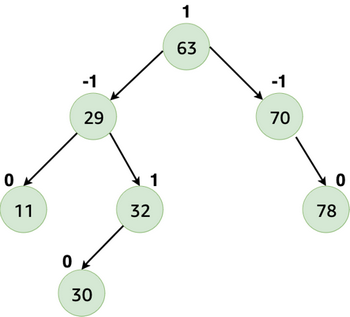

## AVL Tree Implementation

### AVLTreeNode Class
This will be **essentially** the **same as** the **regular tree node** we saw earlier, with just an **additional height field**. The height is initialized to 1, because a node by itself would be considered a subtree of height 1. But that's largely a placeholder, because the value will be updated as we insert nodes into the tree.

In [ ]:
class AVLTreeNode:
    '''
    Tree node for an AVL Tree.
    '''
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

### AVLTree Class
The ***AVLTree*** class **implementation** will be **largely the same as** the Binary Search Tree. In the implementation below started off with a simple copy/paste of the **BinarySearchTree class** implemented earlier.

**Even** the *insert* method is **practically** the **same code** ... **except** that **after each insert**, it will **initiate** a call to an ***_rebalance**** method, that will rebalance the tree according to the standard AVL algorithm rules.

In [ ]:
class AVLTree:
    '''
    An AVL Tree
    '''
    def __init__(self):
        # initializes the root of the tree
        self.root = None

        # track size of tree
        self._size = 0

    def insert(self, new_key):
        '''
        Starting at the root, invoke recursive method to insert node for this key
        '''
        self.root = self._insert_node(self.root, new_key)

    def _insert_node(self, curr_node, new_key):
        '''
        This method will insert a node in the binary tree, by recursively trying to insert on the left or right subtree,
        depending on whether the key is smaller or larger than the current node.

        Returns the node that was inserted.
        '''
        # if the current node is None, than we found the right place to insert, so create a node for the key
        if curr_node is None:
            self._size += 1
            return AVLTreeNode(new_key)
        
        # else, if the new key is less than the current key, recursively try to insert on the left
        elif new_key < curr_node.key:
            curr_node.left = self._insert_node(curr_node.left, new_key)
            
        # else, if the new key is greater than the current key, recursively try to insert on the right
        elif new_key > curr_node.key:
            curr_node.right = self._insert_node(curr_node.right, new_key)
        # else, we went through both < and > comparisons, so the key is equal to the current key, so do nothing

        return self._rebalance_tree(curr_node, new_key)

    def _rebalance_tree(self, curr_node, new_key):
        # update the height of the current node, based on the height of its children
        curr_node.height = 1 + max(self._tree_height(curr_node.left), self._tree_height(curr_node.right))

        # calculate the balance factor of the current node
        balance = self._balance_factor(curr_node)

        # Left-Left case:
        # Subtree is left-heavy, and left subtree also left-heavy
        if balance > 1 and new_key < curr_node.left.key:
            # rotate subtree right
            return self._right_rotate(curr_node)
            
        # Right-Right case:
        # Subtree is right-heavy, and right subtree also right-heavy
        if balance < -1 and new_key > curr_node.right.key:
            # rotate subtree left
            return self._left_rotate(curr_node)

        # Left-Right case:
        # Subtree is left-heavy, and left subtree is right-heavy
        if balance > 1 and new_key > root.left.key:
            # first rotate the left subtree left
            curr_node.left = self._left_rotate(curr_node.left)
            # then rotate the entire subtree right
            return self._right_rotate(curr_node)

        # Right-Left case:
        # Subtree is right-heavy, and right subtree is left-heavy
        if balance < -1 and new_key < curr_node.right.key:
            # first rotate the right subtree right
            curr_node.right = self._right_rotate(curr_node.right)
            # then rotate the entire subtree left
            return self._left_rotate(curr_node)
        
        # return the updated node
        return curr_node

    def _tree_height(self, node):
        '''
        This method will return the height of the sub-tree of a node
        '''
        # if the node is None, height is zero
        if not node:
            return 0
            
        #  return the height attribute in the node
        return node.height

    def _balance_factor(self, node):
        '''
        This methos will return the balance factor for a node, by subtract the height of the right subtree from the left
        '''
        # if the node is None, balance factor is zero
        if not node:
            return 0

        # return result based on the height of left and right subtrees
        return self._tree_height(node.left) - self._tree_height(node.right)

    def _left_rotate(self, z):
        '''
        Rotate the AVL subtree to the left. This uses a standard AVL algorithm.
        '''
        y = z.right
        T2 = y.left

        y.left = z
        z.right = T2

        z.height = 1 + max(self._tree_height(z.left), self._tree_height(z.right))
        y.height = 1 + max(self._tree_height(y.left), self._tree_height(y.right))

        return y

    def _right_rotate(self, z):
        '''
        Rotate the AVL subtree to the right. This uses a standard AVL algorithm.
        '''
        y = z.left
        T3 = y.right

        y.right = z
        z.left = T3

        z.height = 1 + max(self._tree_height(z.left), self._tree_height(z.right))
        y.height = 1 + max(self._tree_height(y.left), self._tree_height(y.right))

        return y

    def size(self):
        '''
        Returns the size of the tree (numbet of nodes). Size is being maintained as we insert new nodes,
        otherwise we would have to traverse the whole tree to count.
        '''
        return self._size

    def _traverse_tree(self, node, result):
        '''
        This method will recursively traverse a tree in order from lowest to highest, starting from the input node
        '''

        # if the node is not None
        if node:
            # recursively traverse the left sub-tree first, since we want to traverse from smallest to largest
            self._traverse_tree(node.left, result)

            # now append current node to result list
            result.append(node.key)

            # recursively traverse the right sub-tree for the larger items
            self._traverse_tree(node.right, result)

    def traverse(self):
        '''
        Returns a list of the tree's data, in order from smallest to largest
        '''

        # kick off a recursive traversal of the tree, starting at the root
        result = []
        self._traverse_tree(self.root, result)
        return result
    
    def _search(self, curr_node, search_key):
        '''
        Search for a value in the binary search tree, by recursively looking for it on the left and right subtree,
        depending on whether the value is smaller or larger than the current node.
        '''
        # if the current node is None, then the value is not in the tree
        if (curr_node is None):
            return False

        # if the current node value is the same as the search value, return True
        elif (curr_node.key == search_key):
            return True

        # else, if the search value is larger, then try to find on the right
        elif (search_key > curr_node.key):
            return self._search(curr_node.right, search_key)

        # else the search value is smaller, so try to find on the left
        else:
            return self._search(curr_node.left, search_key)

    def search(self, search_key):
        '''
        Search for a value in the binary search tree.
        This will trigger a recursive lookup, starting at the root of the tree.
        '''
        return self._search(self.root, search_key)
        
    def _to_str(self, curr_node, level):
        '''
        Recursive function that will print elements of a tree, indenting to the right based on level
        '''
        # initialize return string
        curr_str = ""
        edge_indicator = ""
        
        # if the current node is not None ...
        if curr_node:
            # set an indicator to help visualize which children nodes
            if (curr_node.left and curr_node.right):
                edge_indicator = "<"
            elif (curr_node.left):
                edge_indicator = "\\"
            elif (curr_node.right):
                edge_indicator = "/"
            else:
                edge_indicator = ""
                
            # recusively add the right sub-tree, incresing the level (indentation)
            curr_str += self._to_str(curr_node.right, level + 1) 

            # add the data in this node (including the balance factor)
            curr_str += "          " * level
            curr_str += str(curr_node.key) + "(" + str(self._balance_factor(curr_node)) + ")" + edge_indicator + "\n"

            # recusively add the left sub-tree, incresing the level (indentation)
            curr_str += self._to_str(curr_node.left, level + 1)

        # return string for this node/sub-tree
        return curr_str               

    def __str__(self):
        '''
        Call internal method that will recursively print all nodes, starting with the root
        '''
        # starting add the root, generate string recursively
        return self._to_str(self.root, 0)

#### Quick Test

In [ ]:
# create a new binary tree
test_tree= AVLTree()

# add data to the tree
test_tree.insert(7)
test_tree.insert(4)
test_tree.insert(9)
test_tree.insert(2)
test_tree.insert(5)
test_tree.insert(3)

print(f"My tree has {test_tree.size()} nodes, and it looks a little like this:\n")
print(test_tree)

### Compare side by side with Binary Search Tree
Let's now run a **test side by side**, inserting the **same values** into our **regular BinarySearchTree** (the same class we tested earlier), **and** the **new AVLTree.**

#### Create two new trees

In [ ]:
bst_tree = BinarySearchTree()
avl_tree = AVLTree()

#### Insert a few items in both

In [ ]:
# insert into BST
bst_tree.insert(50)
bst_tree.insert(25)
bst_tree.insert(75)

#insert into AVL
avl_tree.insert(50)
avl_tree.insert(25)
avl_tree.insert(75)

#### Verify both trees

In [ ]:
print(f"------------ Binary Search Tree ------------\n{bst_tree}\n")
print(f"----------------- AVL Tree ----------------\n{avl_tree}\n")

Not surprisingly, for just a few items, the trees look the same. Now let's **add** a few more **items that** it would **cause** an **imbalance**. 

#### Insert items that will cause imbalance

In [ ]:
# insert into BST
bst_tree.insert(100)
bst_tree.insert(125)

#insert into AVL
avl_tree.insert(100)
avl_tree.insert(125)

#### Verify both trees

In [ ]:
print(f"------------ Binary Search Tree ------------\n{bst_tree}\n")
print(f"----------------- AVL Tree ----------------\n{avl_tree}\n")

Noticed how the **AVL tree readjusted**?

#### One final test to really push the envelope

In [ ]:
# insert into BST
bst_tree.insert(157)
bst_tree.insert(178)
bst_tree.insert(12)
bst_tree.insert(29)
bst_tree.insert(5)
bst_tree.insert(-13)
bst_tree.insert(153)
bst_tree.insert(202)
bst_tree.insert(198)
bst_tree.insert(145)

#insert into AVL
avl_tree.insert(157)
avl_tree.insert(178)
avl_tree.insert(12)
avl_tree.insert(29)
avl_tree.insert(5)
avl_tree.insert(-13)
avl_tree.insert(153)
avl_tree.insert(202)
avl_tree.insert(198)
bst_tree.insert(145)

#### Verify both trees

In [ ]:
print(f"------------ Binary Search Tree ------------\n{bst_tree}\n")
print(f"----------------- AVL Tree ----------------\n{avl_tree}\n")

I rest my case :-)

#### What about the AVL Tree performance?
I won't bother re-running the same search performance tests, because if you compare the **search code** for the ***BinarySearchTree*** **class** and the ***AVLTree*** **class**, they are **exactly the same**. They were copy/pasted. **So** the ***AVLTree*** will **certainly not perform** any **worse**. In fact, **if** the ***BinarySearchTree*** is **greatly imbalanced**, we **expect** the ***ABLTree*** will **perform better**. That's why it exists.